# Feature Engineering

## Propósito
O principal objetivo desse estudo é descobrir as características que capturem tendências, sazonalidades, autocorrelações e outras informações temporais relevantes nos dados de séries temporais, tais como o histórico relacionado à carteira de investimentos, patrimônios em geral e produtos.

## Fases do Estudo
- Fase 1: Validar a presença de multicolinearidade entre as variáveis:
        patrimonio_total, patrimonio_xp, pl_investimentos_declarado pl_total
e todas as posições de produtos.
- Fase 2: Validada a presença ou não, seguir com a engenharia com todas as variáveis que representam posição. Com isso teremos 396 novos features para modelagem.

## Parâmetros do estudo
Para capturar tendências, sazonalidades e autocorrelações em dados, será empregado as algumas técnicas de feature engineering. Aqui estão algumas abordagens que foi considerado de valor:

1. Transformações de Dados: Aplicar a diferenciação ou suavização exponencial, para capturar tendências e sazonalidades.

2. Médias Móveis: Calcular tendências locais ao longo do tempo pode ser útil. Isso pode ajudar a suavizar os dados e destacar padrões de tendência.

3. Decomposição de Séries Temporais: Usar técnicas de decomposição, como a decomposição de séries temporais aditiva ou multiplicativa, para separar os dados em componentes de tendência, sazonalidade e ruído, facilitando a análise desses padrões.

4. Variáveis de Rolling Window: Criar variáveis que representam estatísticas agregadas ao longo de uma janela deslizante no tempo, como médias móveis, desvios padrão móveis, mínimos, máximos, etc.

*** Não foi possível proceguir devido a falta de exemplos (>24)

5. Variáveis de Diferenciação: Além das diferenças de primeira ordem, também foi considerado as diferenças sazonais ou de ordem superior para capturar padrões mais complexos nos dados.


## Fonte de dados
Foram selecionadas as seguintes features da base de dados:



In [1]:
import pandas as pd

dataset = pd.read_csv('base_teste_m.csv').set_index(['account_xp_code'])

C:\Users\Wande\AppData\Local\Temp\ipykernel_13704\2677817226.py:3: DtypeWarning: Columns (136,174) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('base_teste_m.csv').set_index(['account_xp_code'])


In [2]:
# Filtrando dados or colunas // 'ano_mes/mes'
data = dataset.filter([
    'account_xp_code','patrimonio_total', 'ano_mes/mes',
    'patrimonio_xp','pl_investimentos_declarado','pl_kilima','pl_offshore_brl',
    'pl_offshore_brl_avenue','pl_offshore_usd','pl_offshore_usd_avenue','pl_rv',
    'pl_total','pl_wealth',
    
    'posicao_acoes','posicao_aluguel',
    'posicao_clubesdeinvestimento','posicao_coe','posicao_compromissadas','posicao_fia',
    'posicao_fim','posicao_firf',
    
    'posicao_fundos_alternativos','posicao_fundos_deinflacao',
    'posicao_fundos_internacionais','posicao_fundos_multimercados','posicao_fundos_rendafixa_posfixado',
    'posicao_fundos_rendafixa_prefixado','posicao_fundosdeinvestimento','posicao_fundosimobiliarios',
    'posicao_mercadoriasefuturos','posicao_opcoes','posicao_opcoes_derivativos_de_balcao',
    'posicao_opcoes_opcoes','posicao_ouro','posicao_portfolio_alternativos',
    'posicao_portfolio_inflacao','posicao_portfolio_internacional','posicao_portfolio_multimercados',
    'posicao_portfolio_posfixado','posicao_portfolio_prefixado','posicao_portfolio_rendavariavel',
    'posicao_previdenciaprivada','posicao_produtosestruturados','posicao_proventos',
    'posicao_proventos_acoes','posicao_proventos_fundosimobiliarios','posicao_proventos_rendafixa',
    'posicao_rendafixa','posicao_rendafixa_inflacao','posicao_rendafixa_posfixada',
    'posicao_rendafixa_prefixada','posicao_seguros','posicao_termos',
    'posicao_tesourodireto','posicao_tesourodireto_inflacao','posicao_tesourodireto_posfixada',
    'posicao_tesourodireto_prefixada',
    
    'possui_kilima','qualificacao','saldo_disponivel',
    'suitability','assessor_username_m1','diversificacao','equipe_atual_name','faixa_pld',
    'filial_name','flag_base_adquirida',
    'life_planning_stage','meta','monthly_income','nps_enviado',
    'nps_respondido','pl_financeiro','possuiapolice','praca','ref_receita',
    'segmento','total_first_meetings','total_geral','total_produtos','evadido',
    'contato_assessor','contato_investor','contato_operador','address_state','life_planning_stage',
    'main_bank_name','maritial_status','occupation','is_fake','mes'])

# Sem fake
data = data[data['is_fake'] == 0.0]

# Renomear a coluna 'evadido' para sinalizar a flag
data.rename(columns={'evadido': 'flag_pl_inativo'}, inplace=True)

In [3]:
# Agrupando variaveis similares
data['posicao_fnd'] = data['posicao_fundos_alternativos']+data['posicao_fundos_deinflacao']+data['posicao_fundos_internacionais']+data['posicao_fundos_multimercados']+data['posicao_fundos_rendafixa_posfixado']+data['posicao_fundos_rendafixa_prefixado']+data['posicao_fundosdeinvestimento']+data['posicao_fundosimobiliarios']
data['posicao_opcao'] = data['posicao_opcoes']+data['posicao_opcoes_derivativos_de_balcao']+data['posicao_opcoes_opcoes']
data['posicao_prt'] = data['posicao_portfolio_alternativos'] + data['posicao_portfolio_inflacao']+data['posicao_portfolio_internacional']+data['posicao_portfolio_multimercados']+data['posicao_portfolio_posfixado']+data['posicao_portfolio_prefixado']+data['posicao_portfolio_rendavariavel']
data['posicao_pvt'] = data['posicao_proventos']+data['posicao_proventos_acoes']+data['posicao_proventos_fundosimobiliarios']+data['posicao_proventos_rendafixa']
data['posicao_rf'] = data['posicao_rendafixa']+data['posicao_rendafixa_inflacao']+data['posicao_rendafixa_posfixada']+data['posicao_rendafixa_prefixada']
data['posicao_tsr'] = data['posicao_tesourodireto']+data['posicao_tesourodireto_inflacao']+data['posicao_tesourodireto_posfixada']+data['posicao_tesourodireto_prefixada']

data.drop(columns=['is_fake','posicao_fundos_alternativos','posicao_fundos_deinflacao',
                'posicao_fundos_internacionais','posicao_fundos_multimercados',
                'posicao_fundos_rendafixa_posfixado','posicao_fundos_rendafixa_prefixado',
                'posicao_fundosdeinvestimento','posicao_fundosimobiliarios',
                'posicao_opcoes','posicao_opcoes_derivativos_de_balcao',
                'posicao_opcoes_opcoes','posicao_portfolio_alternativos',
                'posicao_portfolio_inflacao','posicao_portfolio_internacional',
                'posicao_portfolio_multimercados','posicao_portfolio_posfixado',
                'posicao_portfolio_prefixado','posicao_portfolio_rendavariavel',
                'posicao_proventos','posicao_proventos_acoes','posicao_proventos_fundosimobiliarios',
                'posicao_proventos_rendafixa','posicao_rendafixa','posicao_rendafixa_inflacao',
                'posicao_rendafixa_posfixada','posicao_rendafixa_prefixada',
                'posicao_tesourodireto','posicao_tesourodireto_inflacao',
                'posicao_tesourodireto_posfixada','posicao_tesourodireto_prefixada'], axis=1, inplace=True)

In [4]:
# TOTAL CONTATO
data['total_contato'] = data['contato_assessor']+data['contato_investor']+data['contato_operador']
data.drop(['contato_assessor', 'contato_investor', 'contato_operador'], axis=1, inplace=True)

## Evadido

Considerar o cliente que possui 2 meses com pl_total zerado.


In [5]:
# Agrupando por account_xp_code
grouped = data.groupby(level=0)

# Verificando se as últimas duas linhas de cada grupo são 0 e atribuindo 1 ou 0
data['evasao_pl'] = grouped['pl_total'].transform(lambda x: int((x.tail(2) <= 0).all()))

In [6]:
# Resultado
data.loc[237104][['pl_total', 'evasao_pl', 'evadido']]

,pl_total,evasao_pl,evadido
account_xp_code,,,
237104,193.210000,1,False
237104,193.010000,1,False
237104,193.690002,1,False
237104,194.309998,1,True
237104,63.340000,1,False
237104,118.209999,1,False
237104,119.440002,1,False
237104,120.459999,1,False
237104,120.830002,1,False


## Tratamento de dados

### Pt.1 - Análise

- float64    (64)
- object     (18)
- int64       (7)
- bool        (4)

In [7]:
data.dtypes.value_counts()

float64    39
object     14
int64       7
bool        4
Name: count, dtype: int64

In [8]:
# Filter columns with int64 data type
object_columns = data.select_dtypes(include='object').columns

# Filter DataFrame to include only columns with int64 data type
df_object = data[object_columns]

# Group by 'xp_code' and count NaN values in 'nps' column
na_counts_object = df_object.groupby(df_object.index).apply(lambda x: x.isnull().sum()).sum()/len(df_object.index)

na_counts_object.sort_values(ascending=False)

occupation              0.046631
assessor_username_m1    0.013038
qualificacao            0.009258
praca                   0.005500
suitability             0.001826
equipe_atual_name       0.000531
filial_name             0.000531
segmento                0.000531
address_state           0.000064
ano_mes/mes             0.000000
faixa_pld               0.000000
life_planning_stage     0.000000
main_bank_name          0.000000
maritial_status         0.000000
dtype: float64

In [9]:
# Filter columns with int64 data type
float64_columns = data.select_dtypes(include='float64').columns

# Filter DataFrame to include only columns with int64 data type
df_float64 = data[float64_columns]

# Group by 'xp_code' and count NaN values in 'nps' column
na_counts_float64 = df_float64.groupby(df_float64.index).apply(lambda x: x.isnull().sum()).sum()/len(df_float64.index)

na_counts_float64.sort_values(ascending=False)[:20]

posicao_compromissadas          1.000000
pl_offshore_brl_avenue          1.000000
pl_offshore_usd_avenue          1.000000
pl_wealth                       0.999618
total_contato                   0.976791
total_first_meetings            0.922281
posicao_prt                     0.165141
posicao_previdenciaprivada      0.161383
posicao_produtosestruturados    0.161383
posicao_seguros                 0.161383
posicao_termos                  0.161383
posicao_fnd                     0.161383
posicao_firf                    0.161383
posicao_opcao                   0.161383
posicao_pvt                     0.161383
posicao_rf                      0.161383
posicao_tsr                     0.161383
posicao_ouro                    0.161383
patrimonio_total                0.161383
posicao_acoes                   0.161383
dtype: float64

In [10]:
# Filter columns with int64 data type
int64_columns = data.select_dtypes(include='int64').columns

# Filter DataFrame to include only columns with int64 data type
df_int64 = data[int64_columns]

# Group by 'xp_code' and count NaN values in 'nps' column
na_counts_int64 = df_int64.groupby(df_int64.index).apply(lambda x: x.isnull().sum()).sum()/len(df_float64.index)

na_counts_int64.sort_values(ascending=False)[:20]

diversificacao    0.0
meta              0.0
nps_enviado       0.0
nps_respondido    0.0
possuiapolice     0.0
mes               0.0
evasao_pl         0.0
dtype: float64

In [11]:
# Filter columns with int64 data type
bool_columns = data.select_dtypes(include='bool').columns

# Filter DataFrame to include only columns with int64 data type
df_bool = data[bool_columns]

# Group by 'xp_code' and count NaN values in 'nps' column
na_counts_bool = df_bool.groupby(df_bool.index).apply(lambda x: x.isnull().sum()).sum()/len(df_float64.index)

na_counts_bool.sort_values(ascending=False)[:20]

possui_kilima          0.0
flag_base_adquirida    0.0
evadido                0.0
is_fake                0.0
dtype: float64

### Pt. 2 - Processamento

Procedimento para organizar os dados antes da análise:
1. Manipular as categorias
2. Preencher valores nulos existentes


In [12]:
# Preenchendo os nulos
mode_dt = data.mode(dropna=True)
column_object = data.select_dtypes(include='object').columns

for x in column_object:
    data[x] = data[x].fillna(mode_dt[x][0])

data[data.select_dtypes('float64').columns] = data[data.select_dtypes('float64').columns].fillna(0.0)

In [13]:
# %pip install Unidecode

In [14]:
from unidecode import unidecode

# lowercase os categoricos
data[data.select_dtypes(include='object').columns] = data[data.select_dtypes('object').columns].applymap(
    lambda s:s.lower() if type(s) == str else s
    ).applymap(
        lambda s:unidecode(s) if type(s) == str else s
    )

C:\Users\Wande\AppData\Local\Temp\ipykernel_13704\1000235082.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[data.select_dtypes(include='object').columns] = data[data.select_dtypes('object').columns].applymap(


In [15]:
# ocupation - corrigir entradas
data['occupation'].str.replace(' - ','')
data['occupation'] = data['occupation'].apply(lambda x: x == 'outros' if x in ['--','nenhuma','aai','w','product','.','ibmec','afr'] == True else x)

In [16]:
# Ocupação
# Substituindo os valores hardcoded (devido ao replace apenas suportar ate 7 entradas)
data['occupation'] = data['occupation'].replace({'do lar': 'desempregado',
                            'eng': 'engenheiro',
                            'eng.': 'engenheiro',
                            'funcionario publico': 'servidor',
                            'customer success account manager':'gerente',
                            'superior, inspetor e agente de compras e vendas':'comprador',
                            'membro do poder judiciario: ministro do supremo trib sup': 'ministro'})

data['occupation'] = data['occupation'].replace({'trabalhador de instalacoes de processamento quimico': 'quimico',
                                                'trabalhador de artes graficas': 'designer',
                                                'profissionais de letras e de artes': 'professor',
                                                'trabalhador de construcao civil - 709': 'pedreiro',
                                                'industria de produtos farmaceuticos': 'farmaceutico',
                                                'trabalhador metalurgico e siderurgico': 'metalurgico',
                                                'relacoes publicas': 'publicitario'})

data['occupation'] = data['occupation'].replace({'relaçoes institucionais': 'publicitario',
                                                'comunicologo': 'publicitario',
                                                'trabalhador agricola': 'fazendeiro',
                                                'profissional liberal': 'autonomo',
                                                'investment advisor': 'advisor',
                                                'head de investimentos': 'investimentos',
                                                'representante comercial': 'comercial'})

data['occupation'] = data['occupation'].replace({'agente autonomo de investimentos': 'assessor',
                                                'prod de conteudo digital': 'marketing',
                                                'instituicoes financeiras, sociedades': 'socio',
                                                'oficiais das forcas armadas e forcas auxiliares': 'militar',
                                                'capitalista recebendo rendimento de aplicacao de capital': 'investidor',
                                                'servicos de reparacao e manutencao': 'tecnico',
                                                'outros trabalhadores de nivel superior ligados ao ensino': 'professor'})

data['occupation'] = data['occupation'].replace({'ramo de construção civil': 'construcao',
                                                'cap da reserva remunerada do exercito': 'capitao',
                                                'trab. autonomo': 'autonomo',
                                                'socio-diretor': 'socio',
                                                'coord de supply chain': 'coordenador',
                                                'funcionario publico': 'servidor'})

# Extraindo apenas a primeira ocorrencia da array
data['occupation'] = data['occupation'].apply(lambda x: str(x).split()[0] if len(str(x).split())>1 else str(x))

# [Depois da 1° substituicao] Subsitituindo os categoricos que são femininos que repetem
data['occupation'] = data['occupation'].replace({'ger': 'gerente',
                                                'autonoma': 'autonomo',
                                                'socia': 'socio',
                                                'professora': 'professor',
                                                'aposentada': 'aposentado',
                                                'empresaria': 'empresario',
                                                'advogada': 'advogado'})

data['occupation'] = data['occupation'].replace({'tecnica': 'tecnico',
                                                'psicologa': 'psicologo',
                                                'consultora': 'consultor',
                                                'medica': 'medico',
                                                'tradutora': 'tradutor',
                                                'coordenadora': 'coordenador',
                                                'biomedica': 'biomedico'})

data['occupation'] = data['occupation'].replace({'fotografa': 'fotografo',
                                            'produtora': 'produtor',
                                            'escriva': 'escrivao',
                                            'consultora': 'consultor',
                                            'juiza': 'juiz',
                                            'eng': 'engenheiro',
                                            'eng.': 'engenheiro'})

In [17]:
# Qualificacao
# Extraindo apenas a segunda ocorrencia da array
data['qualificacao'] = data['qualificacao'].apply(lambda x: str(x).split()[1] if len(str(x).split())>1 else str(x))

In [18]:
# Bancos
data['main_bank_name'] = data['main_bank_name'].replace({'banco ':''})
data['main_bank_name'] = data['main_bank_name'].apply(lambda x: str(x).strip().split()[0] if len(str(x).split())>1 else str(x))

In [19]:
# Estado Civil
data['maritial_status'] = data['maritial_status'].replace({
    'casado(a) com brasileiro(a)  nato(a)': 'casado(a) nativo',
    'casado(a) com estrangeiro(a)': 'casado(a) natural',
    'casado(a) com brasileiro(a) naturalizado': 'casado(a) natural',
})

In [20]:
# Criando um dicionário de mapeamento
mapping = {True: 1.0, False: 0.0}

# Aplicando o mapeamento a todas as colunas do tipo booleano usando applymap
data[data.select_dtypes(include='bool').columns] = data[data.select_dtypes(include='bool').columns].applymap(lambda x: mapping[x])

C:\Users\Wande\AppData\Local\Temp\ipykernel_13704\1844066360.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[data.select_dtypes(include='bool').columns] = data[data.select_dtypes(include='bool').columns].applymap(lambda x: mapping[x])


## Correlação, Colinearidade e Estacionaridade
Maneiras de estabelecer um padrão e explicar os dados
1. Correlação & Colinearidade
Quando os recursos são colineares, a permutação de um recurso tem pouco efeito no desempenho do modelo porque pode obter as mesmas informações de um recurso correlacionado.

2. Estacionaridade
A série temporal não exibe tendências sistemáticas, sazonalidade ou variação de variância ao longo do tempo.
Algoritmos com base em regressão pressuepõem que as estatísticas descritivas dos dados permaneçam constantes ao longo do tempo.

Nota.
A estacionaridade vai variar de cliente para cliente.
Por ser um valor estatistico, o resultado é p<0.5 = 1, senao 0, para cada coluna. Introduzir valores boleanos pode nao fazer sentido visto alguns produtos serem zero.
* Algo para validar posteriormente.

### Corr & Colinear

In [21]:
data.dtypes.value_counts()

float64    43
object     14
int64       7
Name: count, dtype: int64

In [22]:
# Encoding object columns and saving the map
from collections import defaultdict
from sklearn import preprocessing
import joblib

#
data_set = data.drop(['ano_mes/mes','evasao_pl','is_fake'], axis=1)

d = defaultdict(preprocessing.LabelEncoder)

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = d[col].fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = d[colname].fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

dataframe_columns = data.select_dtypes('object').columns.to_list()
data_set = MultiColumnLabelEncoder(columns=dataframe_columns).fit_transform(data)

joblib.dump(d, 'label_encoder.joblib')

['label_encoder.joblib']

c:\Users\Wande\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Wande\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


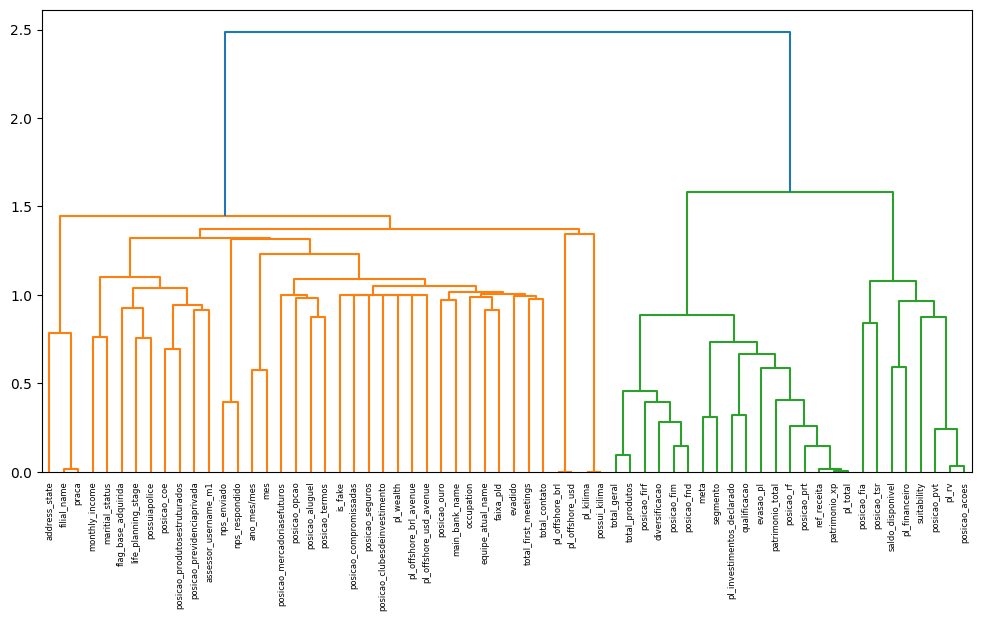

In [23]:
# Multicolinearidade visualização
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

corr = np.round(spearmanr(data_set).correlation, 4)

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

fig, ax = plt.subplots(figsize=(12, 6))

distance_matrix = 1 - np.abs(np.nan_to_num(corr))
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=data_set.columns.to_list(),
    ax=ax,
    leaf_rotation=90
)

In [24]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 0.9, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = data_set.columns[selected_features]

In [25]:
# Criando um subset
sub_data = data_set[selected_features_names].copy()

# Adicionando o evasao_pl
sub_data['evadido'] = data['evadido']
sub_data['evasao_pl'] = data['evasao_pl']
sub_data['ano_mes/mes'] = data['ano_mes/mes']

# Colunas selecionadas pela correlação/colineares
sub_data.columns.to_list()

['patrimonio_total',
 'ano_mes/mes',
 'pl_kilima',
 'pl_offshore_brl',
 'pl_offshore_brl_avenue',
 'pl_offshore_usd_avenue',
 'pl_rv',
 'pl_wealth',
 'posicao_aluguel',
 'posicao_clubesdeinvestimento',
 'posicao_coe',
 'posicao_compromissadas',
 'posicao_fia',
 'posicao_mercadoriasefuturos',
 'posicao_ouro',
 'posicao_previdenciaprivada',
 'posicao_seguros',
 'saldo_disponivel',
 'assessor_username_m1',
 'equipe_atual_name',
 'faixa_pld',
 'filial_name',
 'flag_base_adquirida',
 'life_planning_stage',
 'monthly_income',
 'nps_enviado',
 'total_first_meetings',
 'evadido',
 'main_bank_name',
 'occupation',
 'is_fake',
 'posicao_opcao',
 'total_contato',
 'evasao_pl']

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Agrupar por ano_mes/mes e calcular a soma dos produtos e churn
df_agrupado = sub_data.groupby(sub_data.index).max()[:5]

# Teste de Estacionaridade para cada produto e churn
for col in df_agrupado.columns[:-1]:
    for key in df_agrupado.index:
        try:
            resultado_adf = adfuller(sub_data.loc[key, col])
            df_agrupado.loc[key, col] = 'estacionario' if resultado_adf[1]<0.5 else 'nao_estacionario'
        except Exception as error:
            df_agrupado.loc[key, col] = 'estacionario' 

In [ ]:
df_agrupado

## Sazonalidade


In [29]:
# Base para filtrar para rolling windows
nova_base = sub_data.filter(['ano_mes/mes','mes',
                            'patrimonio_total',
                            'pl_kilima',
                            'pl_offshore_brl',
                            'pl_offshore_brl_avenue',
                            'pl_offshore_usd_avenue',
                            'pl_rv',
                            'pl_wealth',
                            'posicao_aluguel',
                            'posicao_clubesdeinvestimento',
                            'posicao_coe',
                            'posicao_compromissadas',
                            'posicao_fia',
                            'posicao_mercadoriasefuturos',
                            'posicao_ouro',
                            'posicao_previdenciaprivada',
                            'posicao_seguros',
                            'saldo_disponivel'
])

base_teste = nova_base.iloc[:,1:].copy()

In [31]:
# Rolling Windows (54.7s)
"""Essa função é útil para calcular medidas de volatilidade, 
como o desvio padrão, em janelas rolantes, ajudando a entender
a estabilidade ou instabilidade dos dados ao longo do tempo"""

# adicionar cada xp_code como chave no dict
pt_rolling = pd.DataFrame()

for key in base_teste.index.unique():
    temp = pd.DataFrame()
    for col in base_teste.columns:
        cols = f"{col}_rolling"
        s = pd.DataFrame(data=base_teste.loc[key, col].rolling(window=3).mean()) 
        s.rename(columns={col: cols}, inplace=True)
        temp=pd.concat([temp, s], axis=1)
    pt_rolling = pd.concat([pt_rolling, temp], axis=0)

# Preenchendo com 0
pt_rolling.fillna(0, inplace=True)
pt_rolling.replace([np.inf, -np.inf], 0.0, inplace=True)

In [32]:
# Variação percentual (1m 9.7s)
"""Essa função é útil quando você está interessado nas variações
percentuais entre os pontos de dados consecutivos, como a
taxa de crescimento ou declínio de uma série temporal."""

# adicionar cada xp_code como chave no dict
pt_var_percent = pd.DataFrame()

for key in base_teste.index.unique():
    temp = pd.DataFrame()
    for col in base_teste.columns:
        cols = f"{col}_var_perc"
        s = pd.DataFrame(data=base_teste.loc[key, col].pct_change()*100) 
        s.rename(columns={col: cols}, inplace=True)
        temp=pd.concat([temp, s], axis=1)
    pt_var_percent = pd.concat([pt_var_percent, temp], axis=0)

# Preenchendo com 0
pt_var_percent.fillna(0, inplace=True)
pt_var_percent.replace([np.inf, -np.inf], 0.0, inplace=True)

In [33]:
# Diferenciação (48.6s)
"""Essa função é útil quando você está interessado na diferença
absoluta entre os pontos de dados consecutivos, sem considerar
a escala ou a direção da mudança."""

# adicionar cada xp_code como chave no dict
pt_diff = pd.DataFrame()

for key in base_teste.index.unique():
    temp = pd.DataFrame()
    for col in base_teste.columns:
        cols = f"{col}_diff"
        s = pd.DataFrame(data=base_teste.loc[key, col].diff()) 
        s.rename(columns={col: cols}, inplace=True)
        temp=pd.concat([temp, s], axis=1)
    pt_diff = pd.concat([pt_diff, temp], axis=0)

# Preenchendo com 0
pt_diff.fillna(0, inplace=True)
pt_diff.replace([np.inf, -np.inf], 0.0, inplace=True)

In [34]:
# PL/CDI
"""Calcular a razão proporcional entre o pl e o cdi."""

cdi_df = pd.DataFrame({
    'ano_mes/mes':['2023-05','2023-06','2023-07','2023-08','2023-09',
            '2023-10','2023-11','2023-12','2024-01','2024-02',
            '2024-03', '2024-04', '2024-05'],
    'CDI_acum':[13.47, 13.52, 13.57, 13.53, 13.42, 13.40,
                13.29, 13.03, 12.86, 12.73, 12.35, 12.31, 12.31]
    })

cdi_data = pd.merge(sub_data, cdi_df, on='ano_mes/mes', how='left').set_index(sub_data.index)

# Criando razão do cdi
cdi_data['cdi_razao'] = cdi_data['patrimonio_total'] / cdi_data['CDI_acum']

In [35]:
# PL_(PRODUTO) / PATRIMONIO (56s)
"""Calcula a razao em proporcao de cada paramentro em relacao ao patrimonio."""
pt_percent = pd.DataFrame()

for key in base_teste.index.unique():
    temp = pd.DataFrame()
    for col in base_teste.columns:
        cols = f"{col}_pct"
        s = pd.DataFrame(data=base_teste.loc[key, 'patrimonio_total']/base_teste.loc[key, col]) 
        s.rename(columns={0: cols}, inplace=True)
        temp=pd.concat([temp, s], axis=1)
    pt_percent = pd.concat([pt_percent, temp], axis=0)
    
# Removendo patrimonio_total
pt_percent.drop(['patrimonio_total'], axis=1, inplace=True)

# Preenchendo com 0
pt_percent.fillna(0, inplace=True)
pt_percent.replace([np.inf, -np.inf], 0.0, inplace=True)

## Criando um novo dataset

In [36]:
# Selecionando os dados categoricos
data_cat = cdi_data.filter(['ano_mes/mes', 'mes', 'evadido',
    'assessor_username_m1', 'equipe_atual_name', 'faixa_pld', 'filial_name',
    'flag_base_adquirida', 'life_planning_stage', 'monthly_income',
    'nps_enviado', 'total_first_meetings', 'main_bank_name', 'occupation',
    'posicao_opcao', 'total_contato', 'cdi_razao', 'evasao_pl'])

In [37]:
# Concatenando tudo
set_1 = pd.concat([data_cat, pt_rolling], axis=1)
set_2 = pd.concat([set_1, pt_var_percent], axis=1)
set_3 = pd.concat([set_2, pt_diff], axis=1)

In [40]:
# salvando set_3
set_3.to_csv('14052024_nova_base_3K.csv')